# Heart Disease Classification Project

On this project im gonna build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.  

#### 💾 Dataset
We're using the UCI Heart Disease Dataset from kaggle  
🔗 [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv)  

#### Features
`id` (Unique id for each patient)  
`age` (Age of the patient in years)  
`origin` (place of study)  
`sex` (Male/Female)  
`cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])  
`trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))  
`chol` (serum cholesterol in mg/dl)  
`fbs` (if fasting blood sugar > 120 mg/dl)  
`restecg` (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]  
`thalach:` maximum heart rate achieved  
`exang:` exercise-induced angina (True/ False)   
`oldpeak:` ST depression induced by exercise relative to rest  
`slope:` the slope of the peak exercise ST segment  
`ca:` number of major vessels (0-3) colored by fluoroscopy  
`thal:` [normal; fixed defect; reversible defect]  
`num:` the predicted attribute    

So let's get to it...  

In [50]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the datased
df = pd.read_csv("../data/heart_disease_uci.csv")

# taking a look at it
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
# Now let's look at our target column and its values
df.num.value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

From this we can say that:  

`0` = no heart disease  

`1` = mild heart disease  

`2` = moderate heart disease  

`3` = severe heart disease  

`4` = critical heart disease  

And what about missing values...?


In [4]:
# Chacking for missing values
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Exploratory Data Analysis of our Data

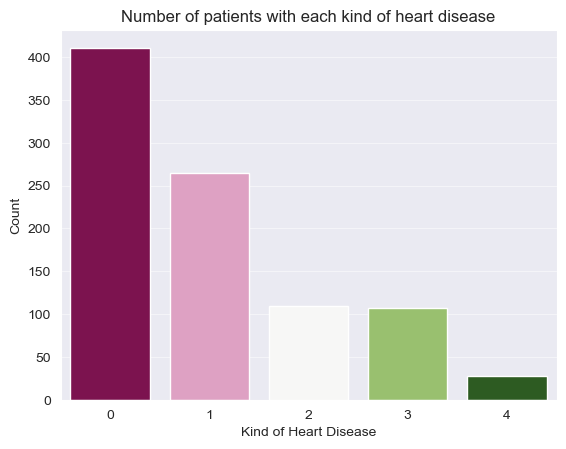

In [108]:
# let's make a quick check about the balance of our target value
import seaborn as sns
sns.set_style('darkgrid')

# Convert value_counts() to a DataFrame
counts_df = df.num.value_counts().reset_index()
counts_df.columns = ['num', 'count']

# Create bar plot
sns.barplot(data=counts_df, x='num', y='count', palette='PiYG', hue="num", legend=False)
plt.grid(True, alpha = 0.5, axis = 'y')
plt.grid(False, axis='x')
plt.xlabel("Kind of Heart Disease")
plt.ylabel("Count")
plt.title("Number of patients with each kind of heart disease");

Mean of age: 53.51086956521739
Median of age: 54.0
Mode of age: 54


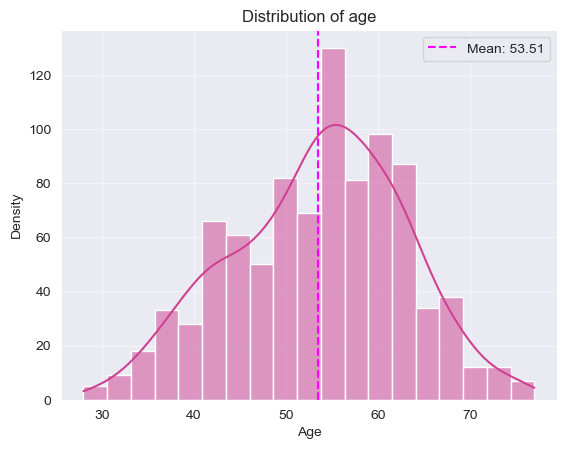

In [115]:
# let's see how's the age distribution
sns.histplot(data=df, x='age', kde=True, color=sns.color_palette('PiYG')[0])
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True, alpha=0.5)

plt.axvline(np.mean(df.age), color = 'fuchsia', linestyle="--", label = f'Mean: {np.mean(df.age):.2f}')
plt.legend()

print(f"Mean of age: {np.mean(df.age)}")
print(f"Median of age: {np.median(df.age)}")
print(f"Mode of age: {df.age.mode()[0]}") # 0 because it returns a series

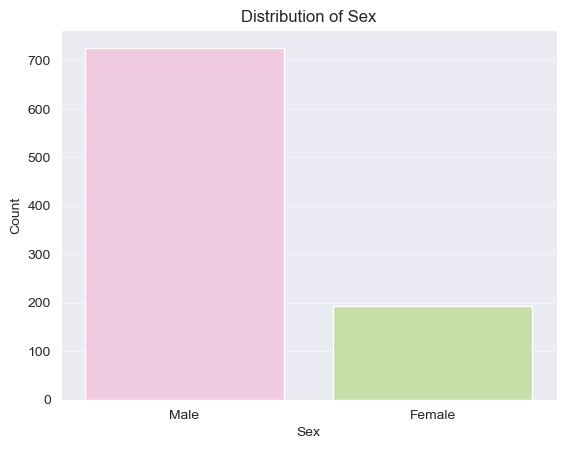

In [116]:
# Let's plot now the distribution of males and females
sex_counts = df.sex.value_counts().reset_index()
sex_counts.columns = ["sex", "count"]

sns.barplot(sex_counts, x = "sex", y="count", palette= 'PiYG', hue= "sex")
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(True, alpha=0.5, axis = 'y')

<Axes: xlabel='cp', ylabel='count'>

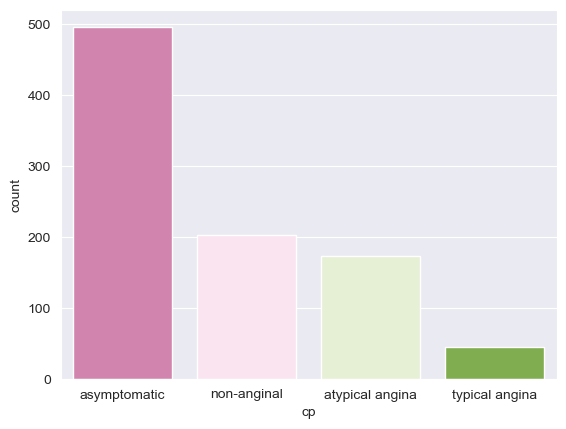

In [119]:
# let's check the different chest pain types and how many occurences those have on our dataset
cp_counts = df.cp.value_counts().reset_index()

sns.barplot(cp_counts, x = "cp", y ="count", palette="PiYG", hue = "cp")